In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from termcolor import colored

import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./data/netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


There are 8807 rows and 12 columns in the dataset.


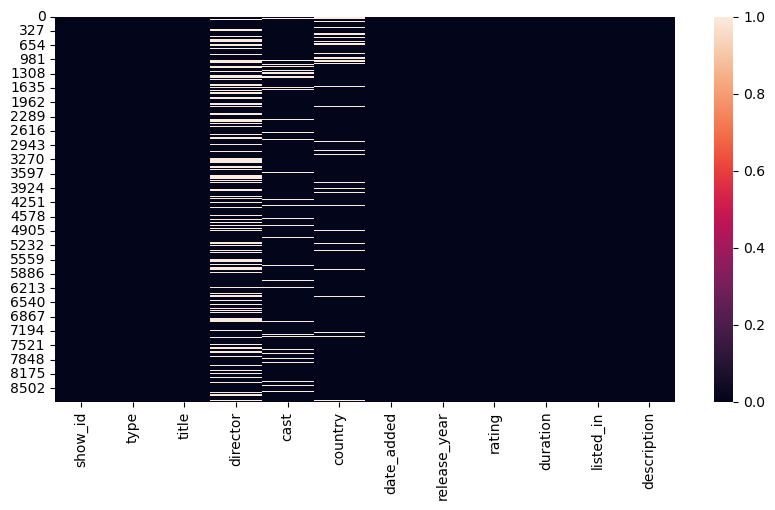

director's null rate: 29.91
cast's null rate: 9.37
country's null rate: 9.44
date_added's null rate: 0.11
rating's null rate: 0.05
duration's null rate: 0.03


In [3]:
def show_missing_values():
    print(
        colored(
            "There are {} rows and {} columns in the dataset.".format(
                df.shape[0], df.shape[1]
            ),
            attrs=["bold"],
        )
    )
    plt.figure(figsize=(10, 5))
    sns.heatmap(df.isnull())
    plt.show()
    for i in df.columns:
        null_rate = df[i].isna().sum() / len(df) * 100
        if null_rate > 0:
            print("{}'s null rate: {}".format(i, round(null_rate, 2)))


show_missing_values()

There are 8790 rows and 12 columns in the dataset.


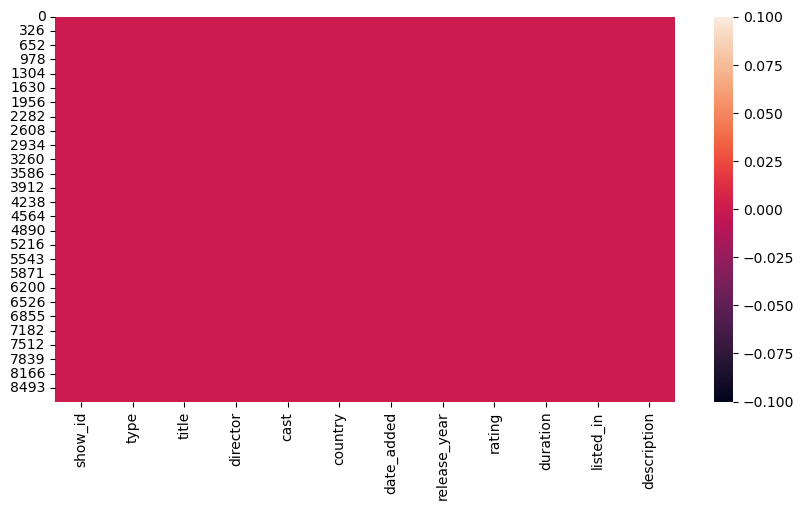

In [4]:
df["director"].replace(np.nan, "No Data", inplace=True)
df["cast"].replace(np.nan, "No Data", inplace=True)
df["country"].replace(np.nan, "No Data", inplace=True)
df.dropna(inplace=True)
show_missing_values()

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [7]:
if "date_added" in df.columns:
    df["date_added"] = pd.to_datetime(df["date_added"])
    df["month_added"] = df["date_added"].dt.month
    df["month_name_added"] = df["date_added"].dt.month_name()
    df["year_added"] = df["date_added"].dt.year
    df.drop("date_added", axis=1, inplace=True)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021


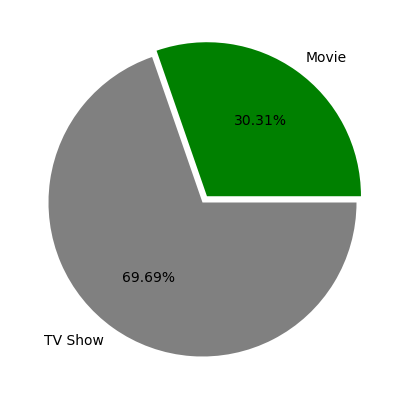

In [8]:
plt.figure(figsize=(10, 5))
plt.pie(
    df["type"].value_counts().sort_values(),
    labels=df["type"].value_counts().index,
    explode=[0.05, 0],
    autopct="%1.2f%%",
    colors=["Green", "Gray"],
)
plt.show()

In [9]:
from collections import Counter

country_data = df["country"]
country_count = pd.Series(
    dict(
        Counter(",".join(country_data).replace(" ,", ",").replace(", ", ",").split(","))
    )
).sort_values(ascending=False)
top20country = country_count.head(20)
top20country.values, top20country.index

(array([3681, 1046,  829,  805,  445,  393,  316,  232,  231,  226,  169,
         162,  158,  117,  113,  105,  103,   99,   97,   91]),
 Index(['United States', 'India', 'No Data', 'United Kingdom', 'Canada',
        'France', 'Japan', 'Spain', 'South Korea', 'Germany', 'Mexico', 'China',
        'Australia', 'Egypt', 'Turkey', 'Hong Kong', 'Nigeria', 'Italy',
        'Brazil', 'Argentina'],
       dtype='object'))

In [10]:
def remove_spine(ax: plt.subplot, spine: list = ["top", "right", "bottom", "left"]):
    ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", which="both", length=0)

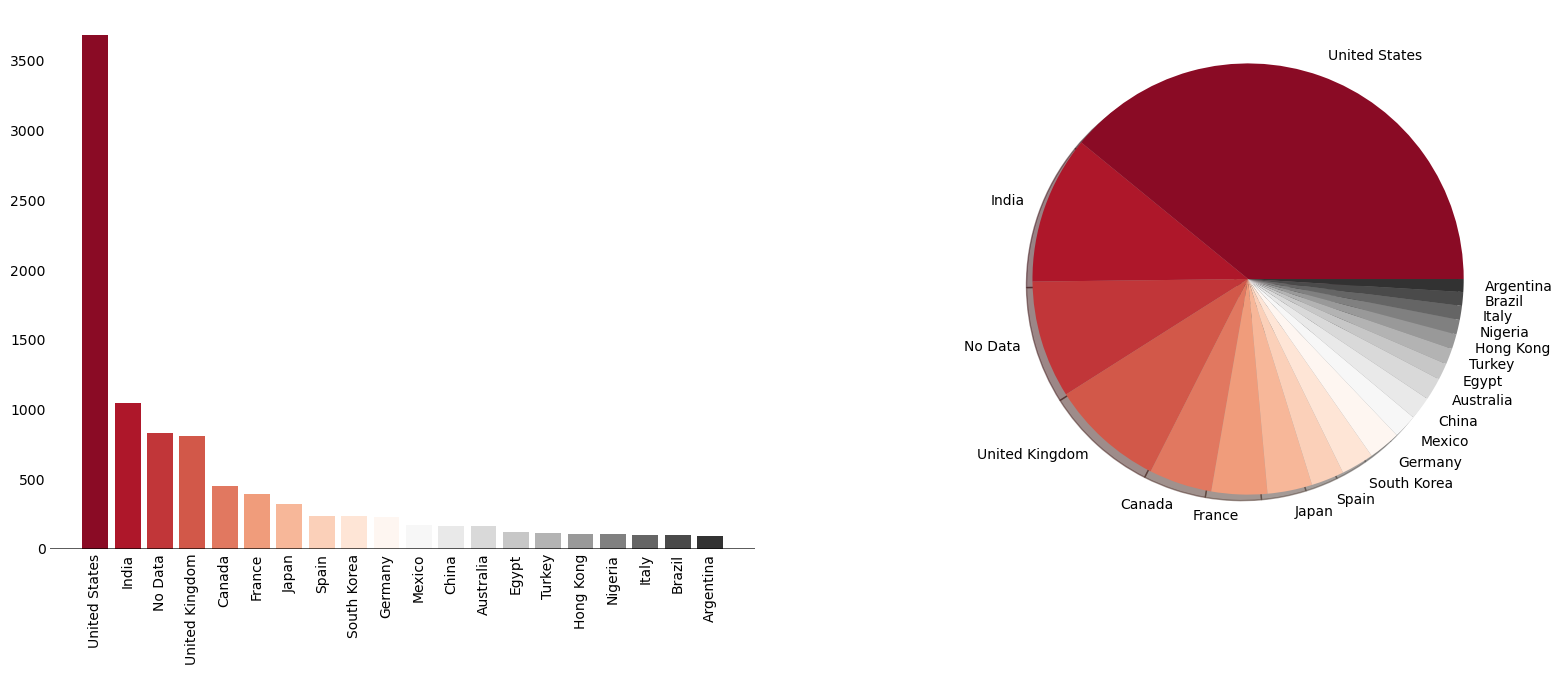

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.bar(
    x=top20country.index,
    height=top20country.values,
    color=sns.color_palette("RdGy", n_colors=20),
)
ax1.set_xticklabels(labels=top20country.index, rotation=90)
remove_spine(ax1)
ax1.tick_params(axis="both", which="both", length=0)
ax1.axhline(y=0, color="black", linewidth=1.3, alpha=0.7)


ax2.pie(
    x=top20country.values,
    labels=top20country.index,
    shadow=True,
    startangle=0,
    colors=sns.color_palette("RdGy", n_colors=20),
)


plt.show()

In [12]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]

In [13]:
def content_year_added(dataframe: pd.DataFrame):
    df_content = (
        dataframe["year_added"]
        .value_counts()
        .reset_index()
        .rename(columns={"index": "year_added", "year_added": "count"})
        .sort_values(by="year_added")
    )
    df_content["percent"] = df_content["count"].apply(
        lambda x: round(x * 100 / sum(df_content["count"]), 2)
    )
    return df_content


df_content = content_year_added(df)
df_tv1 = content_year_added(df_tv)
df_movies1 = content_year_added(df_movies)

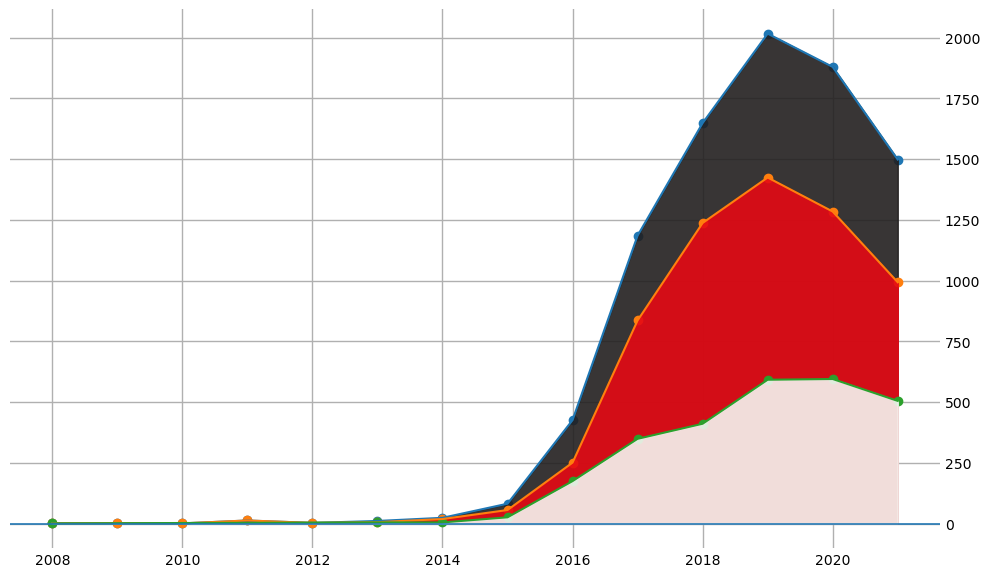

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
colors = ["#221f1f", "#e50914", "#f5f5f1"]

for i, dataframe in enumerate([df_content, df_movies1, df_tv1]):
    ax.plot(dataframe["year_added"].values, dataframe["count"].values)
    ax.scatter(x=dataframe["year_added"].values, y=dataframe["count"].values)
    ax.fill_between(
        x=dataframe["year_added"].values,
        y1=0,
        y2=dataframe["count"].values,
        color=colors[i],
        alpha=0.9,
    )
ax.grid(visible=False, linewidth=1)
ax.set_axisbelow(True)
ax.axhline(y=0, linewidth=1.3, alpha=0.9)
ax.yaxis.tick_right()
remove_spine(ax)

plt.show()

In [15]:
def content_month_added(dataframe: pd.DataFrame):
    df_content = (
        dataframe[["month_added", "month_name_added"]]
        .value_counts()
        .reset_index()
        .rename(columns={0: "count"})
        .sort_values(by="month_added")
        .drop("month_added", axis=1)
    )
    df_content["percent"] = df_content["count"].apply(
        lambda x: round(x * 100 / sum(df_content["count"]), 2)
    )
    return df_content


df_content = content_month_added(df)
df_tv2 = content_month_added(df_tv)
df_movies2 = content_month_added(df_movies)

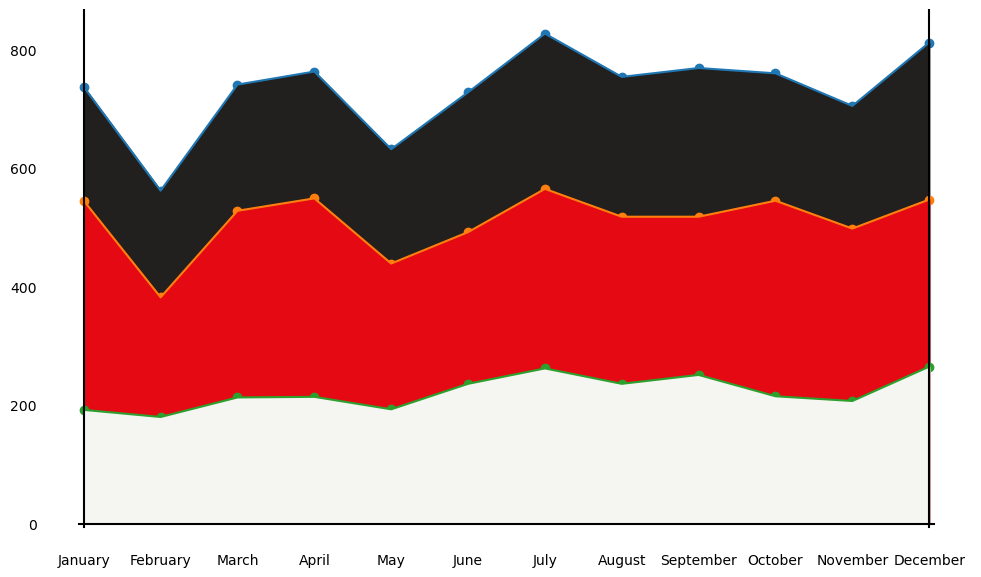

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
for i, dataframe in enumerate([df_content, df_movies2, df_tv2]):
    ax.plot(dataframe["month_name_added"], dataframe["count"])
    ax.scatter(dataframe["month_name_added"], dataframe["count"])
    ax.fill_between(
        dataframe["month_name_added"], y1=0, y2=dataframe["count"], color=colors[i]
    )

ax.axhline(y=0, xmin=0.04, xmax=0.96, color="black")
ax.axvline(x=0, ymin=0.04, color="black")
ax.axvline(x=11, ymin=0.04, color="black")
remove_spine(ax)
plt.show()

In [17]:
from sklearn.preprocessing import MultiLabelBinarizer


def relation_heatmap(df, title):
    df["genre"] = df["listed_in"].apply(
        lambda x: x.replace(" ,", ",").replace(", ", ",").split(",")
    )
    Types = []
    for i in df["genre"]:
        Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types), title))
    test = df["genre"]
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool_)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    pl = sns.heatmap(
        corr,
        mask=mask,
        cmap="coolwarm",
        vmax=0.5,
        vmin=-0.5,
        center=0,
        square=True,
        linewidths=0.7,
        cbar_kws={"shrink": 0.6},
    )
    plt.show()

There are 20 types in the Netflix Movie Dataset


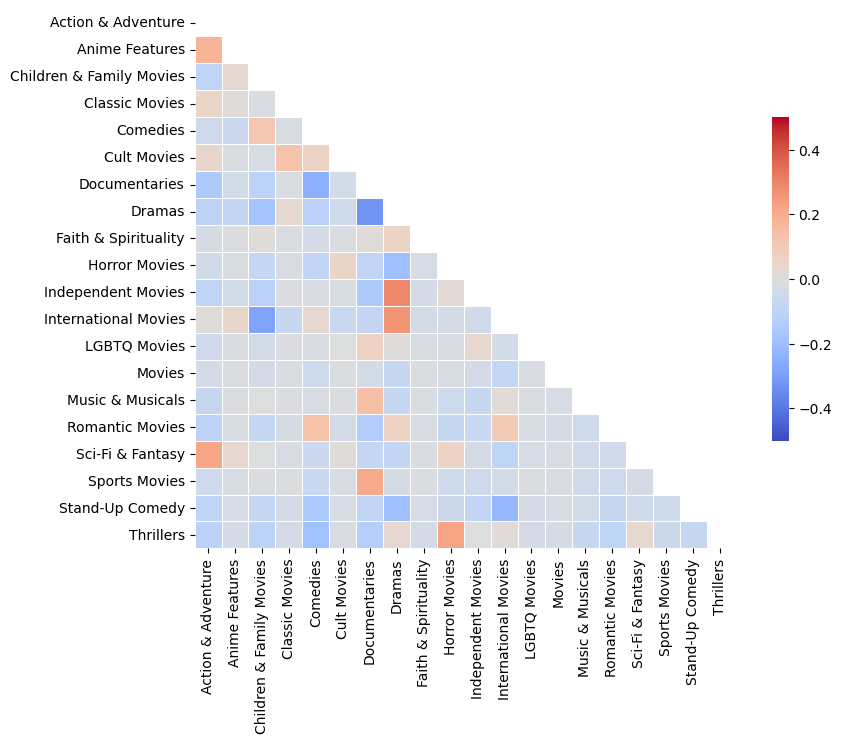

In [18]:
relation_heatmap(df_movies, "Movie")

There are 22 types in the Netflix TV Show Dataset


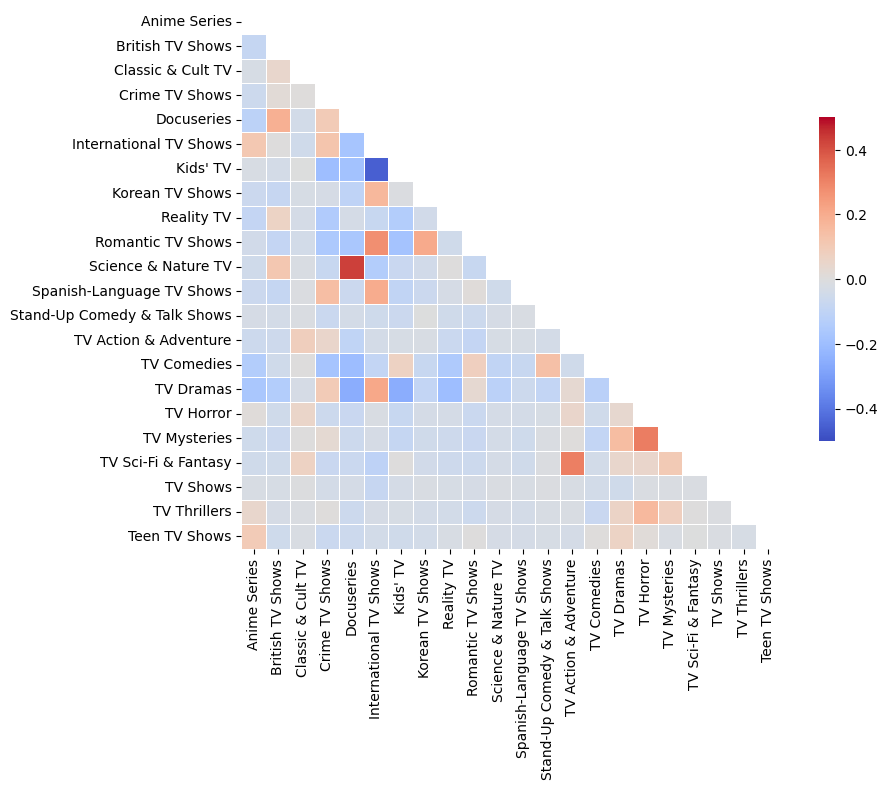

In [19]:
relation_heatmap(df_tv, "TV Show")

In [20]:
rating_order_movie = [
    "G",
    "TV-Y",
    "TV-G",
    "PG",
    "TV-Y7",
    "TV-Y7-FV",
    "TV-PG",
    "PG-13",
    "TV-14",
    "R",
    "NC-17",
    "TV-MA",
]
rating_order_tv = ["TV-Y", "TV-G", "TV-Y7", "TV-Y7-FV", "TV-PG", "TV-14", "R", "TV-MA"]

In [21]:
movie_rating = df_movies["rating"].value_counts()[rating_order_movie]
tv_rating = df_tv["rating"].value_counts()[rating_order_tv]
tv_rating, movie_rating

(TV-Y         175
 TV-G          94
 TV-Y7        194
 TV-Y7-FV       1
 TV-PG        321
 TV-14        730
 R              2
 TV-MA       1143
 Name: rating, dtype: int64,
 G             41
 TV-Y         131
 TV-G         126
 PG           287
 TV-Y7        139
 TV-Y7-FV       5
 TV-PG        540
 PG-13        490
 TV-14       1427
 R            797
 NC-17          3
 TV-MA       2062
 Name: rating, dtype: int64)

In [22]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1, 1, figsize=(15, 7))
    if h_lim:
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data, color="#d0d0d0", width=0.6, edgecolor="black")
    color = ["green", "blue", "orange", "red"]
    span_range = [[0, 2], [3, 6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(["Little Kids", "Older Kids", "Teens", "Mature"]):
        ax.annotate(
            sub_title,
            xy=(sum(span_range[idx]) / 2, height),
            xytext=(0, 0),
            textcoords="offset points",
            va="top",
            ha="center",
            color="w",
            fontsize=16,
            fontweight="bold",
            bbox=dict(boxstyle="round4", pad=0.4, color=color[idx], alpha=0.6),
        )
        ax.axvspan(
            span_range[idx][0] - 0.4,
            span_range[idx][1] + 0.4,
            color=color[idx],
            alpha=0.1,
        )
        ax.set_title(
            f"Distribution of {title} Rating",
            fontsize=20,
            fontweight="bold",
            position=(0.5, 1.0 + 0.03),
        )
        remove_spine(ax)
        ax.axhline(y=0)

    plt.show()

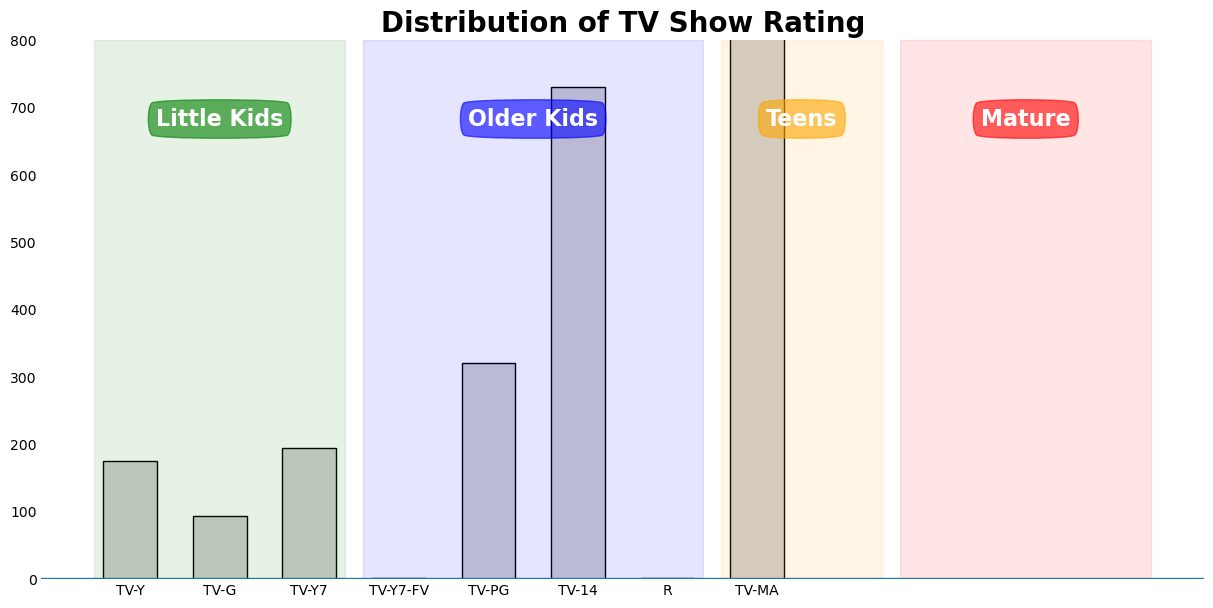

In [23]:
rating_barplot(tv_rating, "TV Show", 700, 800)

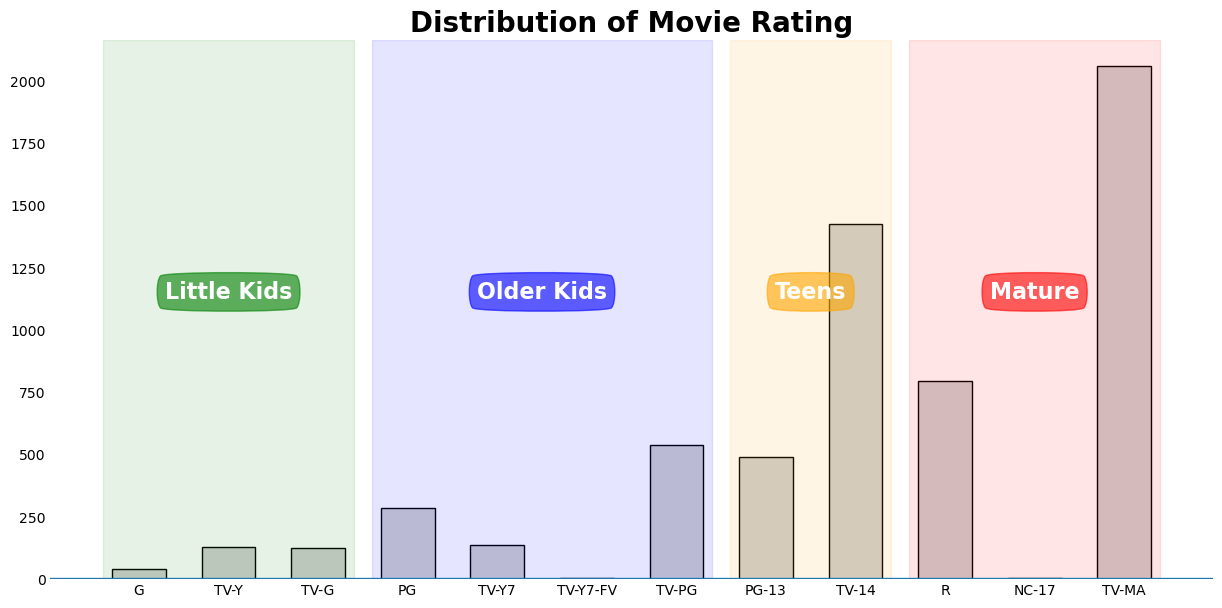

In [24]:
rating_barplot(movie_rating, "Movie", 1200)

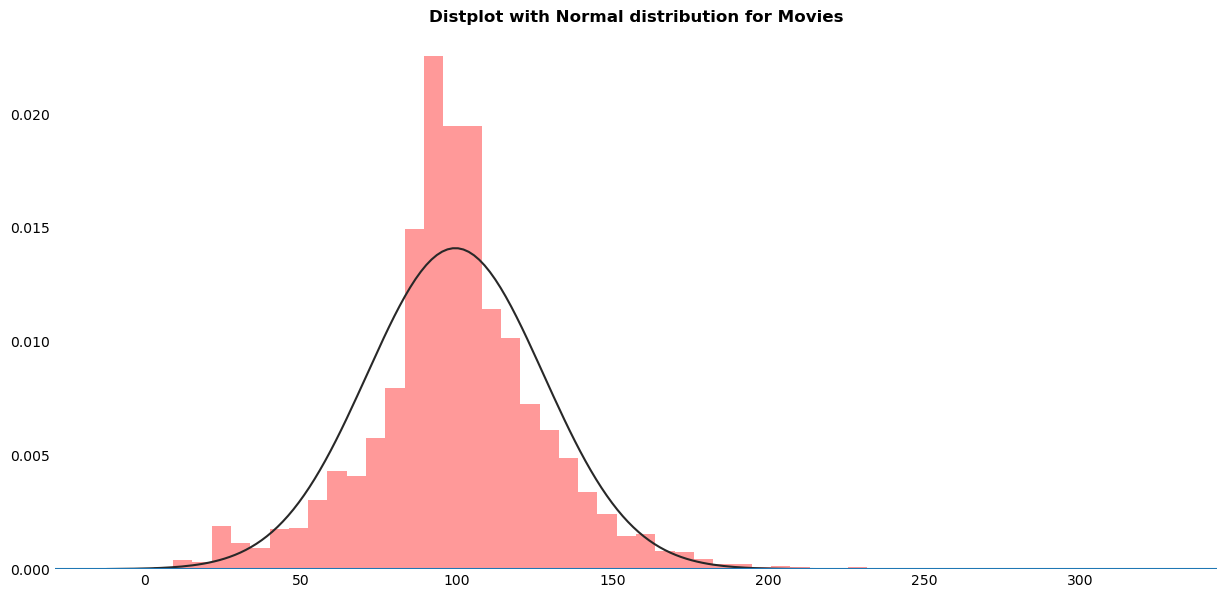

In [25]:
from scipy.stats import norm

plt.figure(figsize=(15, 7))
ax = sns.distplot(
    df_movies["duration"].str.extract("(\d+)"), fit=norm, kde=False, color=["red"]
)
plt.title("Distplot with Normal distribution for Movies", fontweight="bold")
remove_spine(ax)
ax.axhline(y=0)
plt.show()

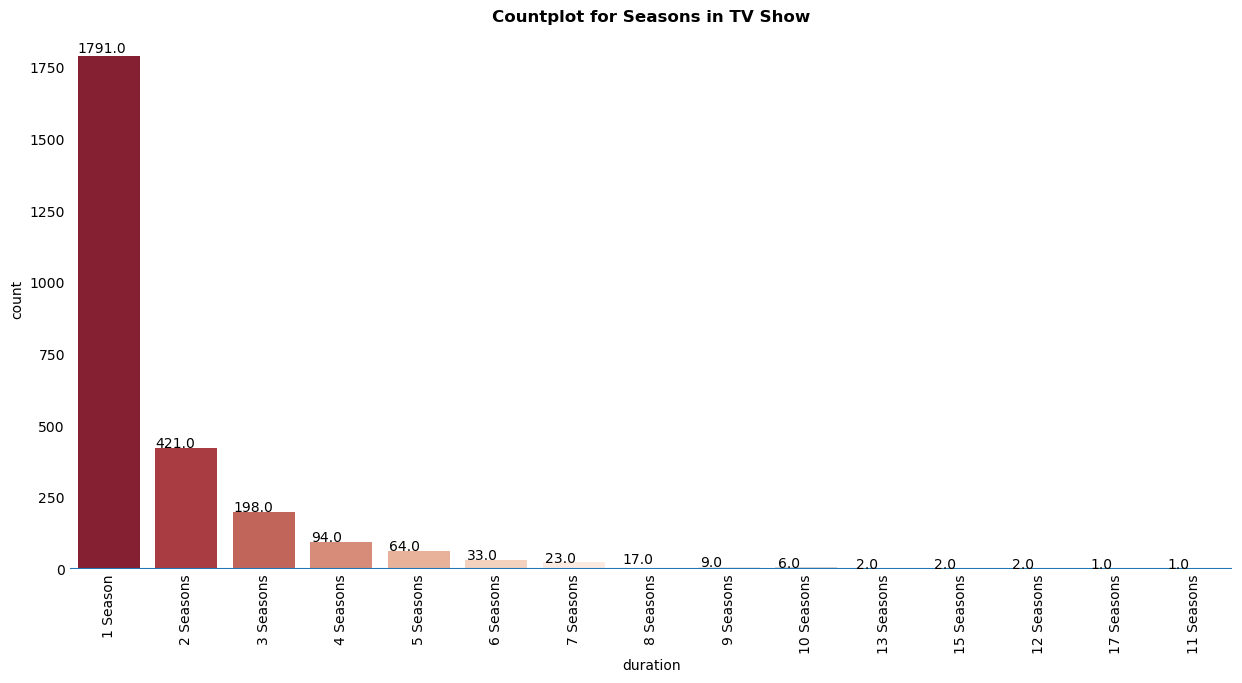

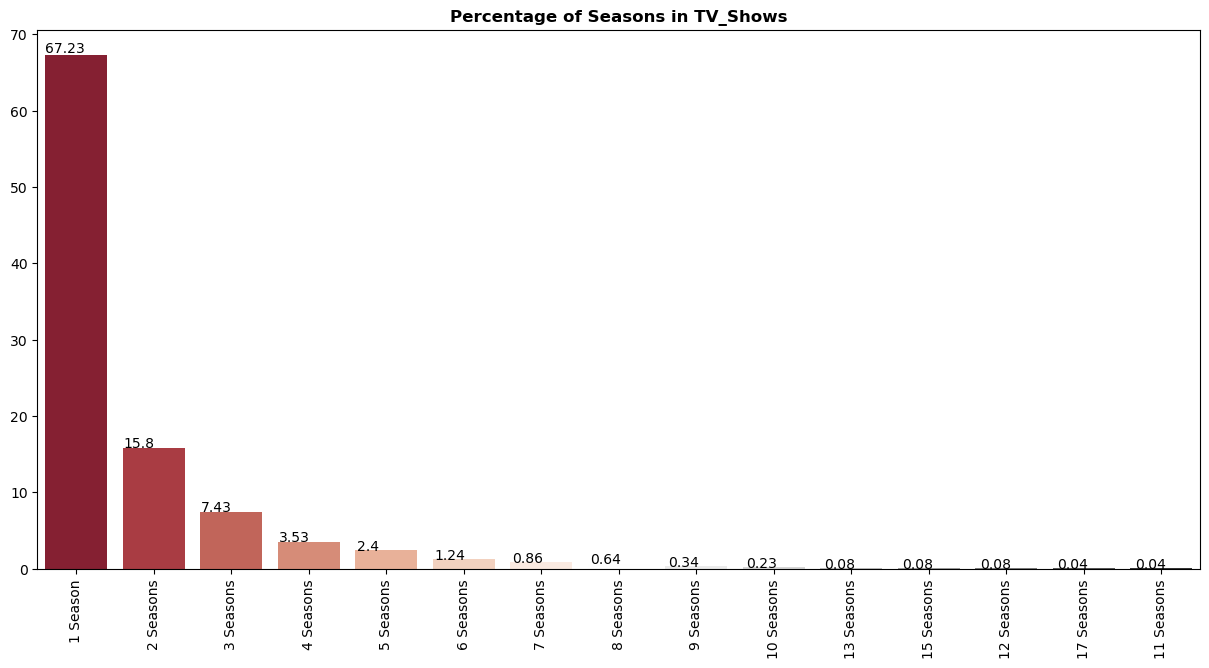

In [26]:
plt.figure(figsize=(15, 7))
duration_order = df_tv["duration"].value_counts().index.tolist()
ax = sns.countplot(x="duration", data=df_tv, order=duration_order, palette="RdGy")
plt.title("Countplot for Seasons in TV Show", fontweight="bold")
plt.xticks(rotation=90)
remove_spine(ax)
ax.axhline(y=0)
for p in ax.patches:
    ax.annotate(
        text=str(p.get_height()), xy=(p.get_x() * 1.005, (p.get_height() * 1.005))
    )
plt.figure(figsize=(15, 7))
ax = sns.barplot(
    x=((df_tv["duration"].value_counts() / df_tv.shape[0]) * 100).index,
    y=round(((df_tv["duration"].value_counts() / df_tv.shape[0]) * 100), 2).values,
    palette="RdGy",
)
plt.title("Percentage of Seasons in TV_Shows", fontweight="bold")
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, (p.get_height() * 1.005)))
plt.show()

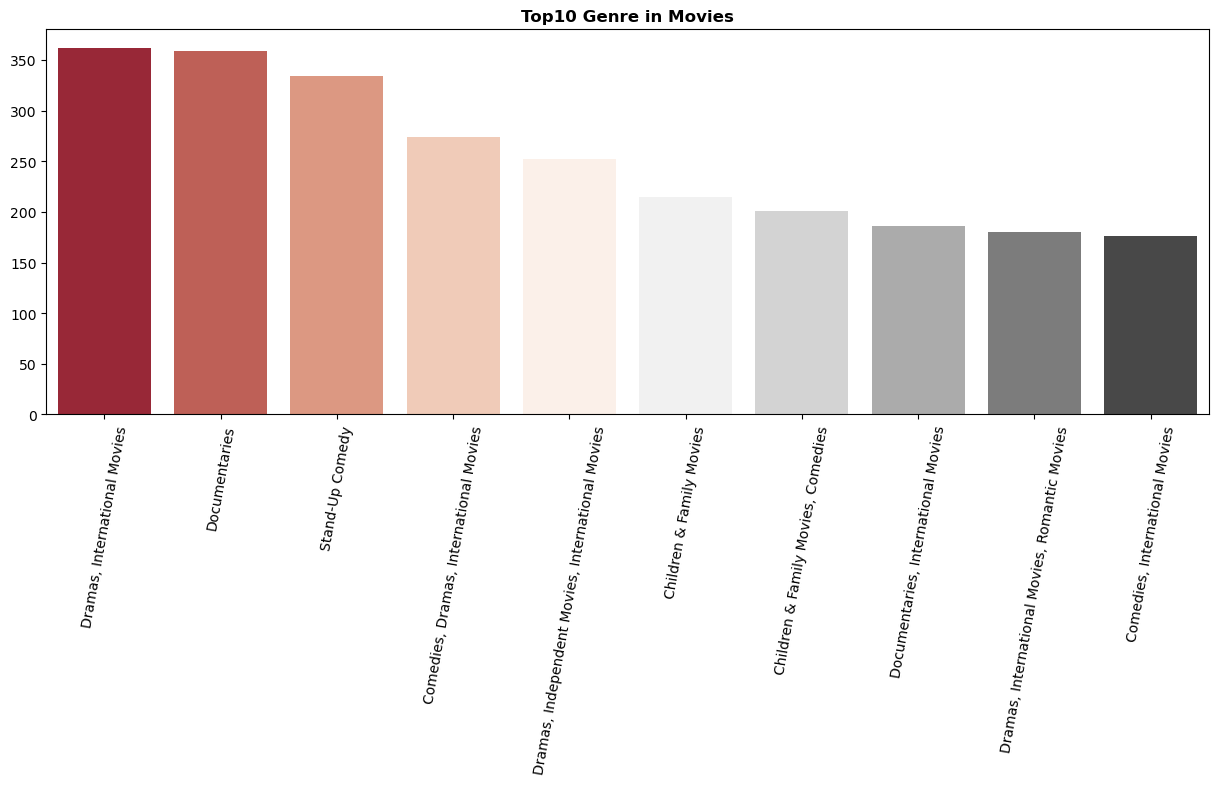

In [27]:
plt.figure(figsize=(15, 5))
sns.barplot(
    x=df_movies["listed_in"].value_counts().head(10).index,
    y=df_movies["listed_in"].value_counts().head(10).values,
    palette="RdGy",
)
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies", fontweight="bold")
plt.show()

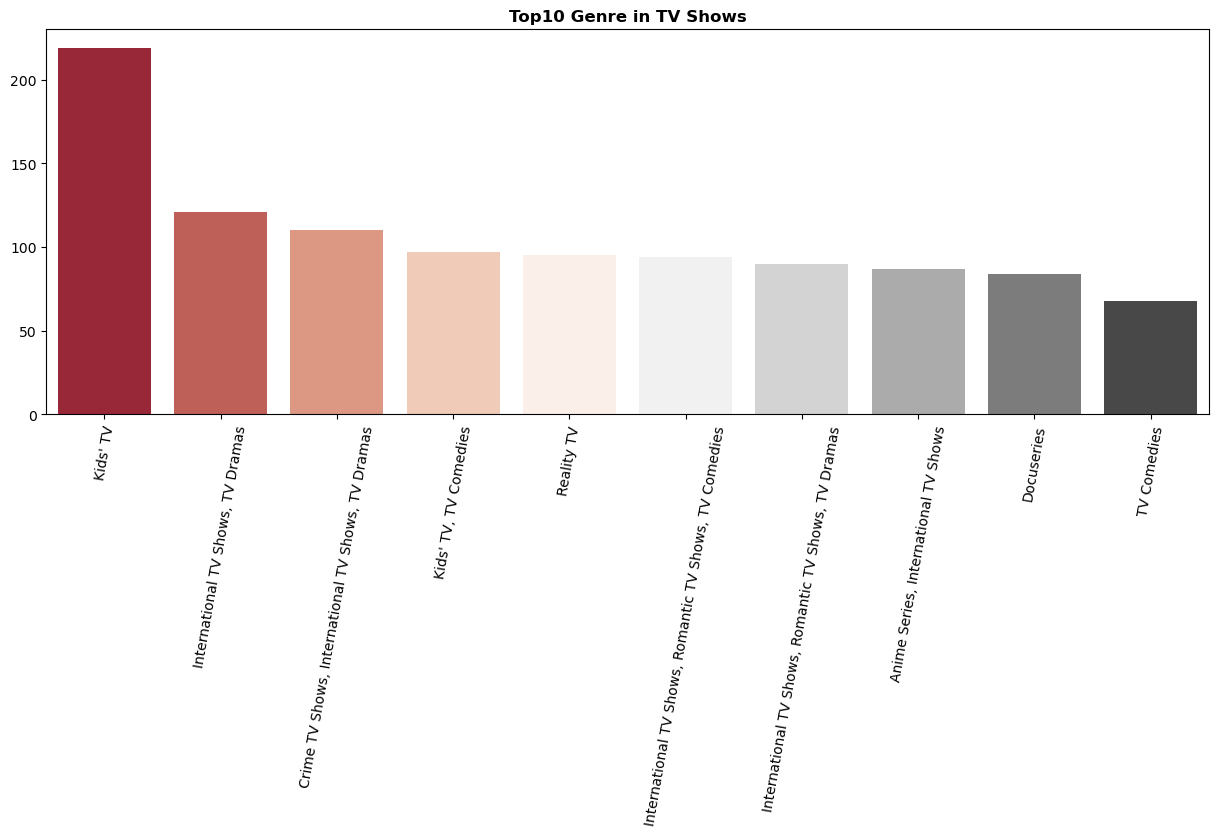

In [28]:
plt.figure(figsize=(15, 5))
sns.barplot(
    x=df_tv["listed_in"].value_counts().head(10).index,
    y=df_tv["listed_in"].value_counts().head(10).values,
    palette="RdGy",
)
plt.xticks(rotation=80)
plt.title("Top10 Genre in TV Shows", fontweight="bold")
plt.show()

In [29]:
df["cast_name"] = df["cast"].apply(
    lambda x: x.replace(" ,", ",").replace(", ", ",").split(",")
)
cast_count = []
for i in df["cast_name"]:
    cast_count += i

cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

df_cast_count = (
    pd.DataFrame(cast_dict.values(), cast_dict.keys())
    .reset_index()
    .sort_values(0, ascending=False)
    .rename(columns={"index": "cast_name", 0: "count"})
    .iloc[1:21]
)

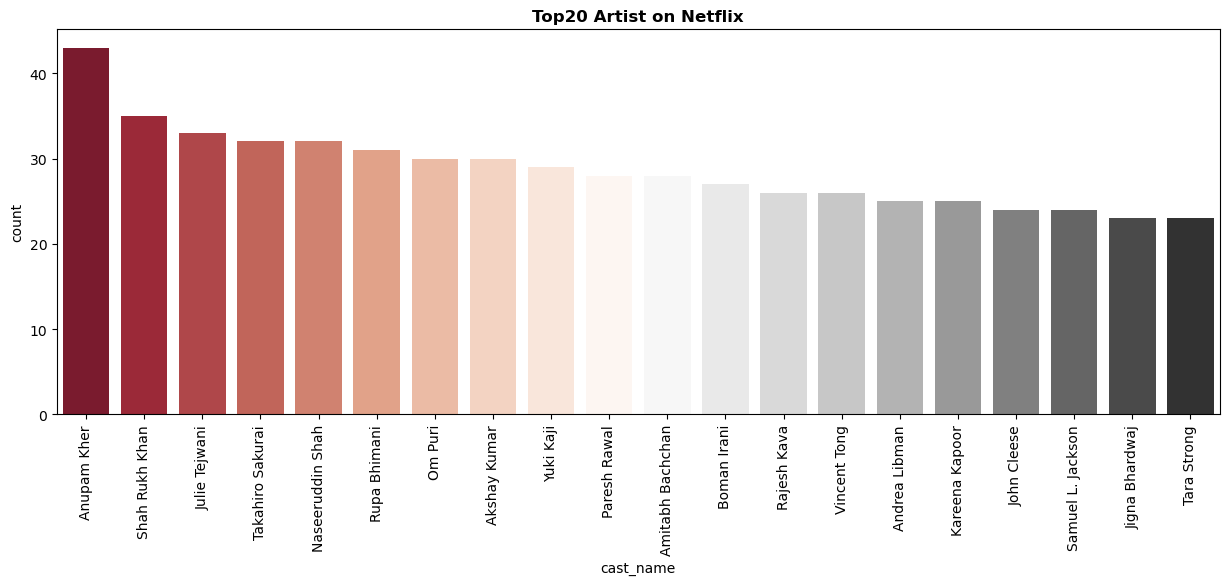

In [30]:
plt.figure(figsize=(15, 5))
sns.barplot(x="cast_name", y="count", data=df_cast_count, palette="RdGy")
plt.title("Top20 Artist on Netflix", fontweight="bold")
plt.xticks(rotation=90)
plt.show()